In [ ]:
nt some brekbreaknow

# Assignment 1
In this assignment, we will go through basic linear algebra, NumPy, and image manipulation using Python to get everyone on the same page.

One of the aims of this assignment is to get you to start getting comfortable searching for useful library functions online. So in many of the functions you will implement, you will have to look up helper functions.

\

## Instructions
* This notebook contain blocks of code, you are required to complete those blocks(where required)
* You are required to copy this notebook ("copy to drive" above) and complete the code.
* For Submission, You'll be required to submit a sharable link for your copy of this notebook. (DO NOT CHANGE THE NAME OF THE FUNCTIONS)

\
\
Also, I'd like to acknowledge the Stanford CS131. This assignment is highly based on the assignments from that course.

First Let's import some dependencies

In [ ]:
# Imports the print function from newer versions of python
from __future__ import print_function
import math
# Setup

# The Random module implements pseudo-random number generators
import random 

# Numpy is the main package for scientific computing with Python. 
# This will be one of our most used libraries in this project
import numpy as np

# The Time library helps us time code runtimes
import time

# These are for image i/o
from PIL import Image
from skimage import color, io


# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Part 1: Linear Algebra and NumPy Review
In this section, we will review linear algebra and learn how to use vectors and matrices in python using numpy.

## Part 1.1 (5 points)
First, let's test whether you can define the following matrices and vectors using numpy. Look up `np.array()` for help. In the next code block, define $M$ as a $(4, 3)$ matrix, $a$ as a $(1, 3)$ row vector and $b$ as a $(3, 1)$ column vector:

$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12 \end{bmatrix}
$$

$$a = \begin{bmatrix}
1 & 1 & 0
\end{bmatrix}
$$

$$b = \begin{bmatrix}
-1 \\ 2 \\ 5
\end{bmatrix}  
$$ 

In [ ]:
### YOUR CODE HERE
pass
M = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
a = np.array([1,1,0])
b = np.array([[-1],[2],[5]])
### END CODE HERE
print("M = \n", M)
print("The size of M is: ", M.shape)
print()
print("a = ", a)
print("The size of a is: ", a.shape)
print()
print("b = ", b)
print("The size of b is: ", b.shape)

M = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
The size of M is:  (4, 3)

a =  [1 1 0]
The size of a is:  (3,)

b =  [[-1]
 [ 2]
 [ 5]]
The size of b is:  (3, 1)


## Part 1.2 (5 points)
Implement the `dot_product()` method below and check that it returns the correct answer for $a^Tb$.

In [ ]:
def dot_product(a, b):
    """Implement dot product between the two vectors: a and b.
    (optional): While you can solve this using for loops, we recommend
    that you look up `np.dot()` online and use that instead.
    Args:
        a: numpy array of shape (x, n)
        b: numpy array of shape (n, x)
    Returns:
        out: numpy array of shape (x, x) (scalar if x = 1)
    """
    out = None
    ### YOUR CODE HERE
    pass
    out = np.dot(a.T,b)
    ### END YOUR CODE
    return out

In [ ]:
# Now, let's test out this dot product. Your answer should be [[1]].
aDotB = dot_product(a, b)
print(aDotB)

print("The size is: ", aDotB.shape)

[1]
The size is:  (1,)


## Part 1.3 (5 points)
Implement the `complicated_matrix_function()` method and use it to compute $(ab)Ma^T$

IMPORTANT NOTE: The `complicated_matrix_function()` method expects all inputs to be two dimensional numpy arrays, as opposed to 1-D arrays.  This is an important distinction, because 2-D arrays can be transposed, while 1-D arrays cannot.

To transpose a 2-D array, you can use the syntax `array.T` 

In [ ]:
def complicated_matrix_function(M, a, b):
    """Implement (a * b) * (M * a.T).
    (optional): Use the `dot_product(a, b)` function you wrote above
    as a helper function.
    Args:
        M: numpy matrix of shape (x, n).
        a: numpy array of shape (1, n).
        b: numpy array of shape (n, 1).
    Returns:
        out: numpy matrix of shape (x, 1).
    """
    out = None
    ### YOUR CODE HERE
    pro1 = np.dot(a,b)
    pro2 = np.dot(M,a.T)
    out = pro1*pro2
    pass
    ### END YOUR CODE

    return out

In [ ]:
# Your answer should be $[[3], [9], [15], [21]]$ of shape(4, 1).
ans = complicated_matrix_function(M, a, b)
print(ans)
print()
print("The size is: ", ans.shape)

[ 3  9 15 21]

The size is:  (4,)


In [ ]:
M_2 = np.array(range(4)).reshape((2,2))
a_2 = np.array([[1,1]])
b_2 = np.array([[10, 10]]).T
print(M_2.shape)
print(a_2.shape)
print(b_2.shape)
print()

# Your answer should be $[[20], [100]]$ of shape(2, 1).
ans = complicated_matrix_function(M_2, a_2, b_2)
print(ans)
print()
print("The size is: ", ans.shape)

(2, 2)
(1, 2)
(2, 1)

[[ 20]
 [100]]

The size is:  (2, 1)


## Part 1.4 (10 points) [Optional/Bonus]
Implement `eigen_decomp()` and `get_eigen_values_and_vectors()` methods. In this method, perform eigenvalue decomposition on the following matrix and return the largest k eigen values and corresponding eigen vectors (k is specified in the method calls below).

$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \end{bmatrix}
$$


In [ ]:
def eigen_decomp(M):
    """Implement eigenvalue decomposition.
    (optional): You might find the `np.linalg.eig` function useful.
    Args:
        matrix: numpy matrix of shape (m, n)
    Returns:
        w: numpy array of shape (m, m) such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].
        v: Matrix where every column is an eigenvector.
    """
    w = None
    v = None
    ### YOUR CODE HERE
    w,v = np.linalg.eig(M)
    
    pass
    ### END YOUR CODE
    return w, v

In [ ]:
def get_eigen_values_and_vectors(M, k):
    """Return top k eigenvalues and eigenvectors of matrix M. By top k
    here we mean the eigenvalues with the top ABSOLUTE values (lookup
    np.argsort for a hint on how to do so.)
    (optional): Use the `eigen_decomp(M)` function you wrote above
    as a helper function
    Args:
        M: numpy matrix of shape (m, m).
        k: number of eigen values and respective vectors to return.
    Returns:
        eigenvalues: list of length k containing the top k eigenvalues
        eigenvectors: list of length k containing the top k eigenvectors
            of shape (m,)
    """
    eigenvalues = []
    eigenvectors = []
    ### YOUR CODE HERE
    w,v = eigen_decomp((M))
    w = abs(w)
    w = np.argsort(w)
    eigenvalues = w[0:k]
    np.reshape(v,[1,v.shape[0]*v.shape[1]])
    v = abs(v)
    v = np.argsort(v)
    eigenvectors = v[0:k]

    pass
    ### END YOUR CODE
    return eigenvalues, eigenvectors

In [ ]:
# Let's define M.
M = np.array([[1,2,3],[4,5,6],[7,8,9]])

# Now let's grab the first eigenvalue and first eigenvector.
# You should get back a single eigenvalue and a single eigenvector.
val, vec = get_eigen_values_and_vectors(M[:,:3], 1)
print("First eigenvalue =", val[0])
print()
print("First eigenvector =", vec[0])
print()
assert len(vec) == 1

# Now, let's get the first two eigenvalues and eigenvectors.
# You should get back a list of two eigenvalues and a list of two eigenvector arrays.
val, vec = get_eigen_values_and_vectors(M[:,:3], 2)
print("Eigenvalues =", val)
print()
print("Eigenvectors =", vec)
assert len(vec) == 2

First eigenvalue = 2

First eigenvector = [0 2 1]

Eigenvalues = [2 1]

Eigenvectors = [[0 2 1]
 [1 0 2]]


## Part 1.5 (10 points)
In this section, you'll implement a gaussian elimination.

The algorithm to to reduce a matrix to rref using gaussian elimination contains 2 parts, First reducing the matrix to partial reduced form, then back substituting to calculate the rref. First algorithm can be summed up as:
1. Partial pivoting: Find the kth pivot by swapping rows, to move the entry with the largest absolute value to the pivot position. This imparts computational stability to the algorithm.
2. For each row below the pivot, calculate the factor f which makes the kth entry zero, and for every element in the row subtract the fth multiple of the corresponding element in the kth row.
3. Repeat above steps for each unknown. We will be left with a partial r.e.f. matrix.

$$\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \end{bmatrix}
=>
\begin{bmatrix}
7 & 8 & 9 \\
4 & 5 & 6 \\
1 & 2 & 3 \end{bmatrix}
=>
\begin{bmatrix}
7 & 8 & 9 \\
0 & 0.42 & 0.85 \\
0 & 0.85 & 1.71 \end{bmatrix}
=>
\begin{bmatrix}
7 & 8 & 9 \\
0 & 0.85 & 1.71 \\
0 & 0.45 & 0.85 \end{bmatrix}
=>
\begin{bmatrix}
7 & 8 & 9 \\
0 & 0.42 & 0.85 \\
0 & 0 & -0.05 \end{bmatrix}
$$
Second algorithm:
1. Take a pivot from the last row.
2. For each row above the pivot, calculate the factor f which makes the kth entry zero, and for every element in the row subtract the fth multiple of the corresponding element in the kth row
3. Repeat the above step untill the matrix is in rref
$$\begin{bmatrix}
7 & 8 & 0 \\
0 & 0.42 & 0 \\
0 & 0 & -0.05 \end{bmatrix}
=>
\begin{bmatrix}
7 & 0 & 0 \\
0 & 0.42 & 0 \\
0 & 0 & -0.05 \end{bmatrix}
$$

Steps for implementation:
1. Complete the function `swap_rows()`
2. Complete the function `apply_row()`
3. Complete `forward()` and `backward()`
4. Finally implement `rref()` using the `forward()` and `backward()`

Note: You can skip this part if you want.

In [ ]:
def swap_rows(M):
    """Implement row swapping to make the largest element in the pivotial column to be the first row.
    Args:
        matrix: numpy matrix of shape (m, n)
    Returns:
        Ms: matrix with swapped row
    """
    Ms = None
    ### YOUR CODE HERE
    max_row = 0
    for i in range(1,M.shape[0]):
      if abs(M[i,1]) > abs(M[0,0]):
        max_row = i
    M[[i,max_row]] = M[[max_row,i]]
    Ms = M
    pass
    ### END YOUR CODE
    return Ms

In [ ]:
def apply_rows(M):
    """For each row below the pivot, calculate the factor f which makes the kth
    entry zero, and for every element in the row subtract the fth multiple of the
    corresponding element in the kth row.
    Args:
        matrix: numpy matrix of shape (m, n)
    Returns:
        Ms: matrix with all other entries of the pivotal col zero
    """
    Ms = None
    ### YOUR CODE HERE
    Ms = np.ones(M.shape[0],M.shape[1])
    Ms[0,:] = M[0,:]
    for i in range(1,M.shape[0]):
      Ms[i,:] = M[i,:] - (M[i,0]/M[0,0])*M[0,:]

    pass
    ### END YOUR CODE   
    return Ms

In [ ]:
def forward(M):
    """Return a partial ref using the algo described above
    Args:
        M: numpy matrix of shape (m, n).
    Returns:
        Ms: ref of M
    """
    Ms = None
    ### YOUR CODE HERE
    #Ms = np.ones(M.shape[0],M.shape[1])

    m = M.shape[0]
    n = M.shape[1]
    curr_row = -1
    curr_col = -1
    
    while curr_row < m-1:
        curr_row +=1
        while True:
            if curr_col == n-1:
                return M
            else:
                curr_col += 1
                max_row = curr_row
                for i in range(curr_row,m):
                    if abs(M[i,curr_col]) > abs(M[curr_row,curr_col]):
                        max_row = i
                if(abs(M[max_row,curr_col]) == 0):
                    continue
                else:
                    M[[curr_row,max_row]] = M[[max_row,curr_row]]
                    break
        for i in range(curr_row+1,m):
            fac = M[i,curr_col]/M[curr_row,curr_col]
            for j in range(0,n):
                M[i,j] -= fac*M[curr_row,j]
    

    Ms = M  
      
      

 
    pass
    ### END YOUR CODE
    return Ms

In [ ]:
def backward(M):
    """Return a rref using the algo described above
    Args:
        M: numpy matrix of shape (m, n).
    Returns:
        Ms: rref of M
    """
    Ms = None
    ### YOUR CODE HERE
    m = M.shape[0]
    n = M.shape[1]
    curr_row = n
    curr_col = m-1
    while curr_row > 0:
        curr_row -= 1
        if curr_col < 0:
            return M
        if M[curr_row,curr_col] == 0:
            continue
        else:
            for i in range(0,curr_row):
                fac = M[i,curr_col]/M[curr_row,curr_col]
                for j in range(0,n):
                    M[i,j] -= fac*M[curr_row,curr_col]
            curr_col -= 1
    Ms = M
    pass
    ### END YOUR CODE
    return Ms

In [ ]:
def rref(M):
    """Return a rref using the algo descrbed above
    Args:
        M: numpy matrix of shape (m, n).
    Returns:
        Ms: ref of M
    """
    Ms = None
    ### YOUR CODE HERE
    Ms = forward(M)
    print(Ms)
    Ms = backward(Ms)
    print(Ms)
    pass
    ### END YOUR CODE
    return Ms

In [ ]:
# Let's define M.
M = np.array([[1,2,3],[4,5,6],[7,8,9]]).astype("float64")

# Now let's calculate it's rref.
# Note that your code may be evaluated on other test cases as well
Mrref = rref(M)
print(Mrref)

[[7.00000000e+00 8.00000000e+00 9.00000000e+00]
 [0.00000000e+00 8.57142857e-01 1.71428571e+00]
 [0.00000000e+00 5.55111512e-17 1.11022302e-16]]
[[-1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-1.71428571e+00 -8.57142857e-01  0.00000000e+00]
 [ 0.00000000e+00  5.55111512e-17  1.11022302e-16]]
[[-1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-1.71428571e+00 -8.57142857e-01  0.00000000e+00]
 [ 0.00000000e+00  5.55111512e-17  1.11022302e-16]]


## Part 1.6 (10 points)

To wrap up our overview of NumPy, let's implement something fun &mdash; a helper function for computing the Euclidean distance between two $n$-dimensional points!

In the 2-dimensional case, computing the Euclidean distance reduces to solving the Pythagorean theorem $c = \sqrt{a^2 + b^2}$. where, given two points $(x_1, y_1)$ and $(x_2, y_2)$, $a = x_1 - x_2$ and $b = y_1 - y_2$.


More generally, given two $n$-dimensional vectors, the Euclidean distance can be computed by:

1. Performing an elementwise subtraction between the two vectors, to get $n$ difference values.
2. Squaring each of the $n$ difference values, and summing the squares.
4. Taking the square root of our sum.

Alternatively, the Euclidean distance between length-$n$ vectors $u$ and $v$ can be written as:

$
\quad\textbf{distance}(u, v) = \sqrt{\sum_{i=1}^n (u_i - v_i)^2}
$


Try implementing this function: first using native Python with a `for` loop in the `euclidean_distance_native()` function, then in NumPy **without any loops** in the `euclidean_distance_numpy()` function.
We've added some `assert`  statements here to help you check functionality (if it prints nothing, then your implementation is correct)!

In [ ]:
def euclidean_distance_native(u, v):
    """Computes the Euclidean distance between two vectors, represented as Python
    lists.
    Args:
        u (List[float]): A vector, represented as a list of floats.
        v (List[float]): A vector, represented as a list of floats.
    Returns:
        float: Euclidean distance between `u` and `v`.
    """
    # First, run some checks:
    assert isinstance(u, list)
    assert isinstance(v, list)
    assert len(u) == len(v)

    # Compute the distance!
    # Notes:
    #  1) Try breaking this problem down: first, we want to get
    #     the difference between corresponding elements in our
    #     input arrays. Then, we want to square these differences.
    #     Finally, we want to sum the squares and square root the
    #     sum.

    ### YOUR CODE HERE
    sq_sum = 0
    for i in range(0,len(u)):
      sq_sum += (u[i] - v[i])*(u[i] - v[i])
    return math.sqrt(sq_sum)
    pass
    ### END YOUR CODE

In [ ]:
def euclidean_distance_numpy(u, v):
    """Computes the Euclidean distance between two vectors, represented as NumPy
    arrays.
    Args:
        u (np.ndarray): A vector, represented as a NumPy array.
        v (np.ndarray): A vector, represented as a NumPy array.
    Returns:
        float: Euclidean distance between `u` and `v`.
    """
    # First, run some checks:
    assert isinstance(u, np.ndarray)
    assert isinstance(v, np.ndarray)
    assert u.shape == v.shape

    # Compute the distance!
    # Note:
    #  1) You shouldn't need any loops
    #  2) Some functions you can Google that might be useful:
    #         np.sqrt(), np.sum()
    #  3) Try breaking this problem down: first, we want to get
    #     the difference between corresponding elements in our
    #     input arrays. Then, we want to square these differences.
    #     Finally, we want to sum the squares and square root the
    #     sum.

    ### YOUR CODE HERE
    distance = np.sqrt(np.sum(np.power(np.subtract(u,v),2)))
   
    pass
    ### END YOUR CODE
    return distance

In [ ]:
## Testing native Python function
assert euclidean_distance_native([7.0], [6.0]) == 1.0
assert euclidean_distance_native([7.0, 0.0], [3.0, 3.0]) == 5.0
assert euclidean_distance_native([7.0, 0.0, 0.0], [3.0, 0.0, 3.0]) == 5.0

In [ ]:
## Testing NumPy function
assert euclidean_distance_numpy(
    np.array([7.0]),
    np.array([6.0])
) == 1.0
assert euclidean_distance_numpy(
    np.array([7.0, 0.0]),
    np.array([3.0, 3.0])
) == 5.0
assert euclidean_distance_numpy(
    np.array([7.0, 0.0, 0.0]),
    np.array([3.0, 0.0, 3.0])
) == 5.0

Next, let's take a look at how these two implementations compare in terms of runtime:

In [ ]:
n = 1000

# Create some length-n lists and/or n-dimensional arrays
a = [0.0] * n
b = [10.0] * n
a_array = np.array(a)
b_array = np.array(b)

# Compute runtime for native implementation
start_time = time.time()
for i in range(10000):
    euclidean_distance_native(a, b)
print("Native:", (time.time() - start_time), "seconds")

# Compute runtime for numpy implementation
# Start by grabbing the current time in seconds
start_time = time.time()
for i in range(10000):
    euclidean_distance_numpy(a_array, b_array)
print("NumPy:", (time.time() - start_time), "seconds")

Native: 2.2150917053222656 seconds
NumPy: 0.21573090553283691 seconds


As you can see, doing vectorized calculations (i.e. no for loops) with NumPy results in significantly faster computations! 

# Part 2: Image Manipulation 

Now that you are familiar with using matrices and vectors. Let's load some images and treat them as matrices and do some operations on them.

In [ ]:
# Run this code to set the locations of the images we will be using. 
# You can change these paths to point to your own images if you want to try them out for fun.

image1_path = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
image2_path = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/OpenCV_Logo_with_text_svg_version.svg/180px-OpenCV_Logo_with_text_svg_version.svg.png'

def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Part 2.1 (5 points)
Implement the load method and read the display method below. We will use these two methods through the rest of the notebook to visualize our work.

Note: There are multiple ways to read an image. You may use any that you like. Google about "PIL", "OpenCV" or "skimage".

In [ ]:
def load(image_path):
    """Loads an image from a file path.
    HINT: Look up `skimage.io.imread()` function.
    Args:
        image_path: file path to the image.
    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """
    out = None

    ### YOUR CODE HERE
    # Use skimage io.imread
    out = io.imread(image_path)
    pass
    ### END YOUR CODE

    # Let's convert the image to be between the correct range.
    out = out.astype(np.float64) / 255
    return out

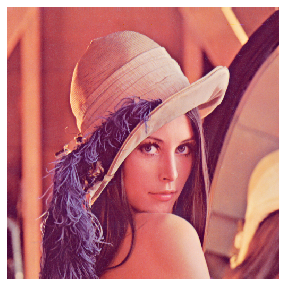

In [ ]:
image1 = load(image1_path)

display(image1)

## Part 2.2 (5 points)
One of the most common operations we perform when working with images is rectangular **cropping**, or the action of removing unwanted outer areas of an image.

Take a look at this code we've written to crop out a small part of the image above:

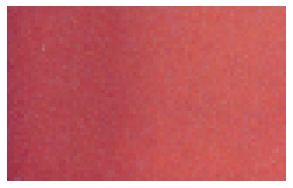

In [ ]:
display(image1[10:60, 70:150, :])

Implement the `crop_image()` method by taking in the starting row index, starting column index, number of rows, and number of columns, and outputting the cropped image. 

Then, in the cell below, see if you can pull out a 100x100 square from each corner of the original `image1`: the top left, top right, bottom left, and bottom right.

In [ ]:
def crop_image(image, start_row, start_col, num_rows, num_cols):
    """Crop an image based on the specified bounds.
    Args:
        image: numpy array of shape(image_height, image_width, 3).
        start_row (int): The starting row index we want to include in our cropped image.
        start_col (int): The starting column index we want to include in our cropped image.
        num_rows (int): Number of rows in our desired cropped image.
        num_cols (int): Number of columns in our desired cropped image.
    Returns:
        out: numpy array of shape(num_rows, num_cols, 3).
    """

    out = None
    out = np.zeros((num_rows,num_cols,3))
    ### YOUR CODE HERE
    for i in range(0,num_rows):
      for j in range(0, num_cols):
        out[i,j,:] = image[i+start_row,j+start_col,:]
    pass
    ### END YOUR CODE

    return out

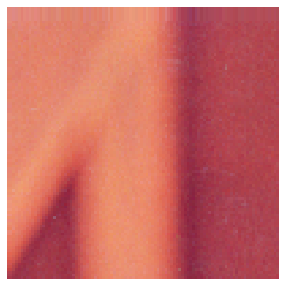

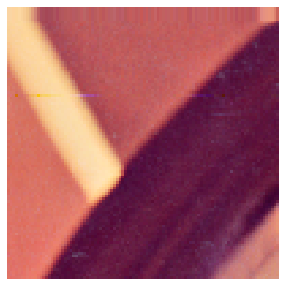

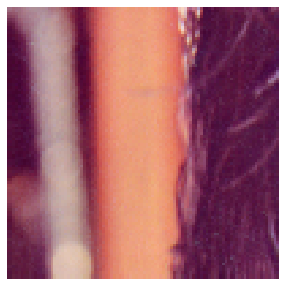

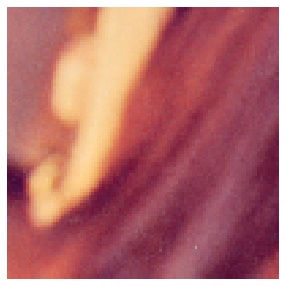

In [ ]:
top_left_corner = crop_image(image1,0,0,100,100) ## Replace "None" with a crop_image() function call.
top_right_corner = crop_image(image1,0,image1.shape[1] - 100,100,100) ## Replace "None" with a crop_image() function call.
bottom_left_corner = crop_image(image1,image1.shape[0] - 100,0,100,100) ## Replace "None" with a crop_image() function call.
bottom_right_corner = crop_image(image1,image1.shape[0] - 100,image1.shape[1] - 100,100,100) ## Replace "None" with a crop_image() function call.

display(top_left_corner)
display(top_right_corner)
display(bottom_left_corner)
display(bottom_right_corner)

## Part 2.3 (10 points)
Implement the `dim_image()` method by converting images according to  $x_n = 0.5*x_p^2$ for every pixel, where $x_n$ is the new value and $x_p$ is the original value.

Note: Since all the pixel values of the image are in the range $[0, 1]$, the above formula will result in reducing these pixels values and therefore make the image dimmer.

In [ ]:
def dim_image(image):
    """Change the value of every pixel by following
                        x_n = 0.5*x_p^2
    where x_n is the new value and x_p is the original value.
    Args:
        image: numpy array of shape(image_height, image_width, 3).
    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """

    out = np.zeros((image.shape[0],image.shape[1],3))

    ### YOUR CODE HERE
    out = 0.5*np.power(image,2)
    pass
    ### END YOUR CODE

    return out

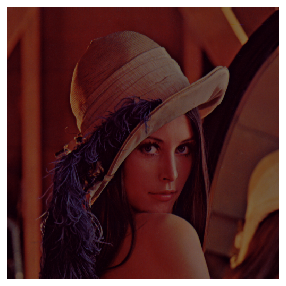

In [ ]:
new_image = dim_image(image1)
display(new_image)

## Part 2.4 (10 points)
Let's try another commonly used operation: image resizing!

At a high level, image resizing should go something like this:

1. We create an (initially empty) output array of the desired size, `output_image`
2. We iterate over each pixel position `(i,j)` in the output image
    - For each output pixel, we compute a corresponding input pixel `(input_i, input_j)`
    - We assign `output_image[i, j, :]` to `input_image[input_i, input_j, :]`
3. We return the resized output image

We want `input_i` and `input_j` to increase proportionally with `i` and `j` respectively:

- `input_i` can be computed as `int(i * row_scale_factor)`
- `input_j` can be computed as `int(j * col_scale_factor)`

...where `int()` is a Python operation takes a float and rounds it down to the nearest integer, and `row_scale_factor` and `col_scale_factor` are constants computed from the image input/output sizes.

Try to figure out what `row_scale_factor` and `col_scale_factor` should be, then implement this algorithm in the `resize_image()` method! Then, run the cells below to test out your image resizing algorithm!

In [ ]:
def resize_image(input_image, output_rows, output_cols):
    """Resize an image using the nearest neighbor method.
    Args:
        input_image (np.ndarray): RGB image stored as an array, with shape
            `(input_rows, input_cols, 3)`.
        output_rows (int): Number of rows in our desired output image.
        output_cols (int): Number of columns in our desired output image.
    Returns:
        np.ndarray: Resized image, with shape `(output_rows, output_cols, 3)`.
    """
    input_rows, input_cols, channels = input_image.shape
    assert channels == 3

    # 1. Create the resized output image
    output_image = np.zeros(shape=(output_rows, output_cols, 3))

    # 2. Populate the `output_image` array using values from `input_image`
    #    > This should require two nested for loops!

    ### YOUR CODE HERE
    row_scale_factor = input_rows/output_rows
    col_scale_factor = input_cols/output_cols
    for i in range(0,output_rows):
      for j in range(0,output_cols):
        input_i = int(i*row_scale_factor)
        input_j = int(j*col_scale_factor)
        output_image[i,j,:] = input_image[input_i,input_j,:]

    pass
    ### END YOUR CODE

    # 3. Return the output image
    return output_image

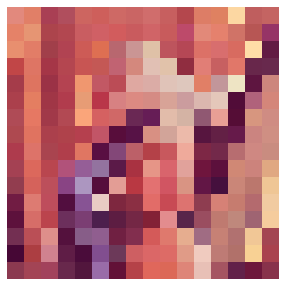

In [ ]:

display(resize_image(image1, 16, 16))

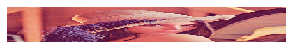

In [ ]:
display(resize_image(image1, 50, 400))

**Question:** In the resize algorithm we describe above, the output is populated by iterating over the indices of the output image. Could we implement image resizing by iterating over the indices of the input image instead? How do the two approaches compare?

> *Your response here!*

## Part 2.5 (15 points)

One more operation that you can try implementing is **image rotation**. This is part of a real interview question that was encountered for actual computer vision jobs (notably at Facebook), and we expect it to require quite a bit more thinking.

#### a) Rotating 2D coordinates (5 points)

Before we start thinking about rotating full images, let's start by taking a look at rotating `(x, y)` coordinates:

![coordinate_rotation.png](https://github.com/StanfordVL/CS131_release/blob/master/fall_2020/hw0_release/coordinate_rotation.png?raw=1)

Using `np.cos()` and `np.sin()`, implement the `rotate2d()` method to compute the coordinates $(x', y')$ rotated by theta radians from $(x, y)$ using the lecture slides. 

Once you've implemented the function, test your implementation below using the assert statements (if it prints nothing, then your implementation is correct):

In [ ]:
def rotate2d(point, theta):
    """Rotate a 2D coordinate by some angle theta.
    Args:
        point (np.ndarray): A 1D NumPy array containing two values: an x and y coordinate.
        theta (float): An theta to rotate by, in radians.
    Returns:
        np.ndarray: A 1D NumPy array containing your rotated x and y values.
    """
    assert point.shape == (2,)
    assert isinstance(theta, float)

    # Reminder: np.cos() and np.sin() will be useful here!

    ## YOUR CODE HERE
    point = np.dot(point,np.array([[np.cos(theta),np.sin(theta)],[-1*np.sin(theta),np.cos(theta)]]))
    pass
    ### END YOUR CODE
    return point

In [ ]:
assert rotate2d(np.array([1.0, 0.0]), 0.0).shape == (
    2,
), "Output shape incorrect!"
assert np.allclose(
    rotate2d(np.array([1.0, 0.0]), 0.0), np.array([1.0, 0.0])
), ""
assert np.allclose(
    rotate2d(np.array([1.0, 0.0]), np.pi / 2.0), np.array([0.0, 1.0])
), ""

Run the cell below to visualize a point as it's rotated around the origin by a set of evenly-spaced angles! You should see 30 points arranged in a circle.

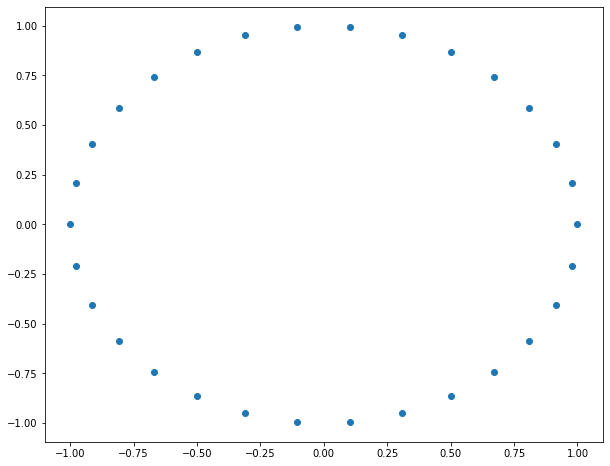

In [ ]:
# Visualize a point being rotated around the origin
# We'll use the matplotlib library for this!
import matplotlib.pyplot as plt

points = np.zeros((30, 2))
for i in range(30):
    points[i, :] = rotate2d(np.array([1.0, 0.0]), i / 30.0 * (2 * np.pi))

plt.scatter(points[:, 0], points[:, 1])
plt.show()

**Question:** Our function currently only rotates input points around the origin (0,0). Using the same `rotate2d` function, how could we rotate the point around a center that wasn't at the origin? **You'll need to do this when you implement image rotation below!**

> *Your response here!*


#### b) Rotate Image (10 points)

Finally, use what you've learned about 2D rotations to create and implement the `rotate_image(input_image, theta)` function!

For an input angle of $\pi/4$ (45 degrees), the expected output is:

![rotated_output.png](https://github.com/StanfordVL/CS131_release/blob/master/fall_2020/hw0_release/rotated_output.png?raw=1)

**Hints:**
- We recommend basing your code off your `resize_image()` implementation, and applying the same general approach as before. Iterate over each pixel of an output image `(i, j)`, then fill in a color from a corresponding input pixel `(input_i, input_j)`. In this case, note that the output and input images should be the same size.
- If you run into an output pixel whose corresponding input coordinates `input_i` and `input_j` that are invalid, you can just ignore that pixel or set it to black.
- In our expected output above, we're rotating each coordinate around the center of the image, not the origin. (the origin is located at the top left)

In [ ]:
def rotate_image(input_image, theta):
    """Rotate an image by some angle theta.
    Args:
        input_image (np.ndarray): RGB image stored as an array, with shape
            `(input_rows, input_cols, 3)`.
        theta (float): Angle to rotate our image by, in radians.
    Returns:
        (np.ndarray): Rotated image, with the same shape as the input.
    """
    input_rows, input_cols, channels = input_image.shape
    assert channels == 3

    # 1. Create an output image with the same shape as the input
    output_image = np.zeros_like(input_image)
    center = np.array([input_rows/2,input_cols/2])
    ## YOUR CODE HERE
    for i in range(0,input_rows):
      for j in range(0,input_cols):
        
         point = np.add(rotate2d(np.subtract(np.array([i,j]),center),theta),center)
         if point[0] >= input_rows or point[0] < 0 or point[1] >= input_cols or point[1] < 0:
           continue
         else:
           output_image[i,j,:] = input_image[int(point[0]),int(point[1]),:]
        
    pass
    ### END YOUR CODE

    # 3. Return the output image
    return output_image

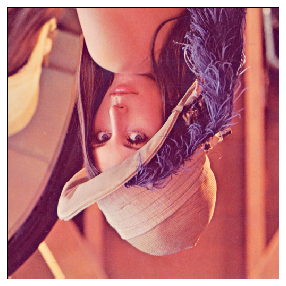

In [ ]:
## Test that your output matches the expected output
display(rotate_image(image1, np.pi / 1.0))

Congrats You've come to the end of this notebook. If you solved everything above, impressive. If not, you might need to read/think a bit more. You can always ask doubts. Also, Note that you should submit it even if you cannot solve everything. We might evaluate these using a script later.